In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import seaborn as sns
import zipfile
from sklearn import preprocessing

In [11]:
#importing train dataset
z_train = zipfile.ZipFile('train.csv.zip')
train = pd.read_csv(z_train.open('train.csv'))

In [12]:
#train.info()

All the entries for the train.csv are non-null values.
However, there might be NONE entries.

In [13]:
#z_test = zipfile.ZipFile('test.csv.zip')
#test = pd.read_csv(z_test.open('test.csv'))
#test.info()

All the entries for the test.csv are non-null values.

In [14]:
#making list of data fields for test and train data
f_test = ['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']
f = f_test + ['Category', 'Descript', 'Resolution']

In [15]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [17]:
print 'total no. of cases: ', len(train)
for feature in f:
    if feature in ['Id']:
        continue
    else:
        print 'no. of unique data in ' + feature + ':', len(train[feature].unique())

 total no. of cases:  878049
no. of unique data in Dates: 389257
no. of unique data in DayOfWeek: 7
no. of unique data in PdDistrict: 10
no. of unique data in Address: 23228
no. of unique data in X: 34243
no. of unique data in Y: 34243
no. of unique data in Category: 39
no. of unique data in Descript: 879
no. of unique data in Resolution: 17


In [18]:
#train['Category'].unique()

In [19]:
#train['Resolution'].unique()

In [20]:
#train['Descript'].unique()

In [21]:
 def extract_date(df):
    """
    function specifically for Dates feature only
    creates new features 
    Year  YYYY
    Month MM
    Date  DD
    Time  HH:MM:SS
    """
    df['Year'] = df['Dates'].apply(lambda x: x[:4])
    df['Month'] = df['Dates'].apply(lambda x: x[5:7])
    df['Date'] = df['Dates'].apply(lambda x: x[8:10])
    df['Time'] = df['Dates'].apply(lambda x: x[-9:])
    return

def make_binary_features(df, feature):
    """
    creates new features with feature name as the name of data 
    if the original data match the new feature name, the data will be 1
    if the original data does not match the new feature name, the data will be 0

    
    ex 
    make_binary_features(df, 'DayOfWeek')
    will create new features
    Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday
    where
    df['Monday'] will have value 1 for all Mondays and 0 for the rest
    """
    for new_feature in df[feature].unique():
        df[new_feature] = df[feature]
        df.loc[df[new_feature] != new_feature, new_feature] = 0
        df.loc[df[new_feature] == new_feature, new_feature] = 1
    return

In [22]:
extract_date (train)
make_binary_features(train, 'DayOfWeek')
make_binary_features(train, 'PdDistrict')
#train.head()

In [23]:
#importing map
mapdata = np.loadtxt('sf_map_copyright_openstreetmap_contributors.txt')
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

ll_lon, ll_lat = -122.52469, 37.69862
ur_lon, ur_lat = -122.33663, 37.82986

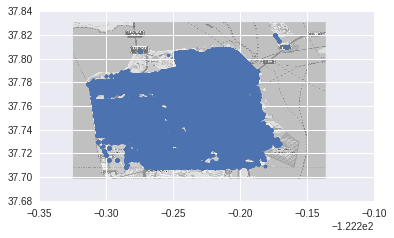

In [26]:
#clean data
train['Xc'] = train[(train.X < ur_lon) & (train.X > ll_lon)].X
train['Yc'] = train[(train.Y < ur_lat) & (train.Y > ll_lat)].Y
train = train.dropna(subset = ['Xc', 'Yc'])

#plotting
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[ll_lon, ur_lon, ll_lat, ur_lat], aspect=asp)
plt.plot(train['Xc'],train['Yc'],'.')
plt.show()

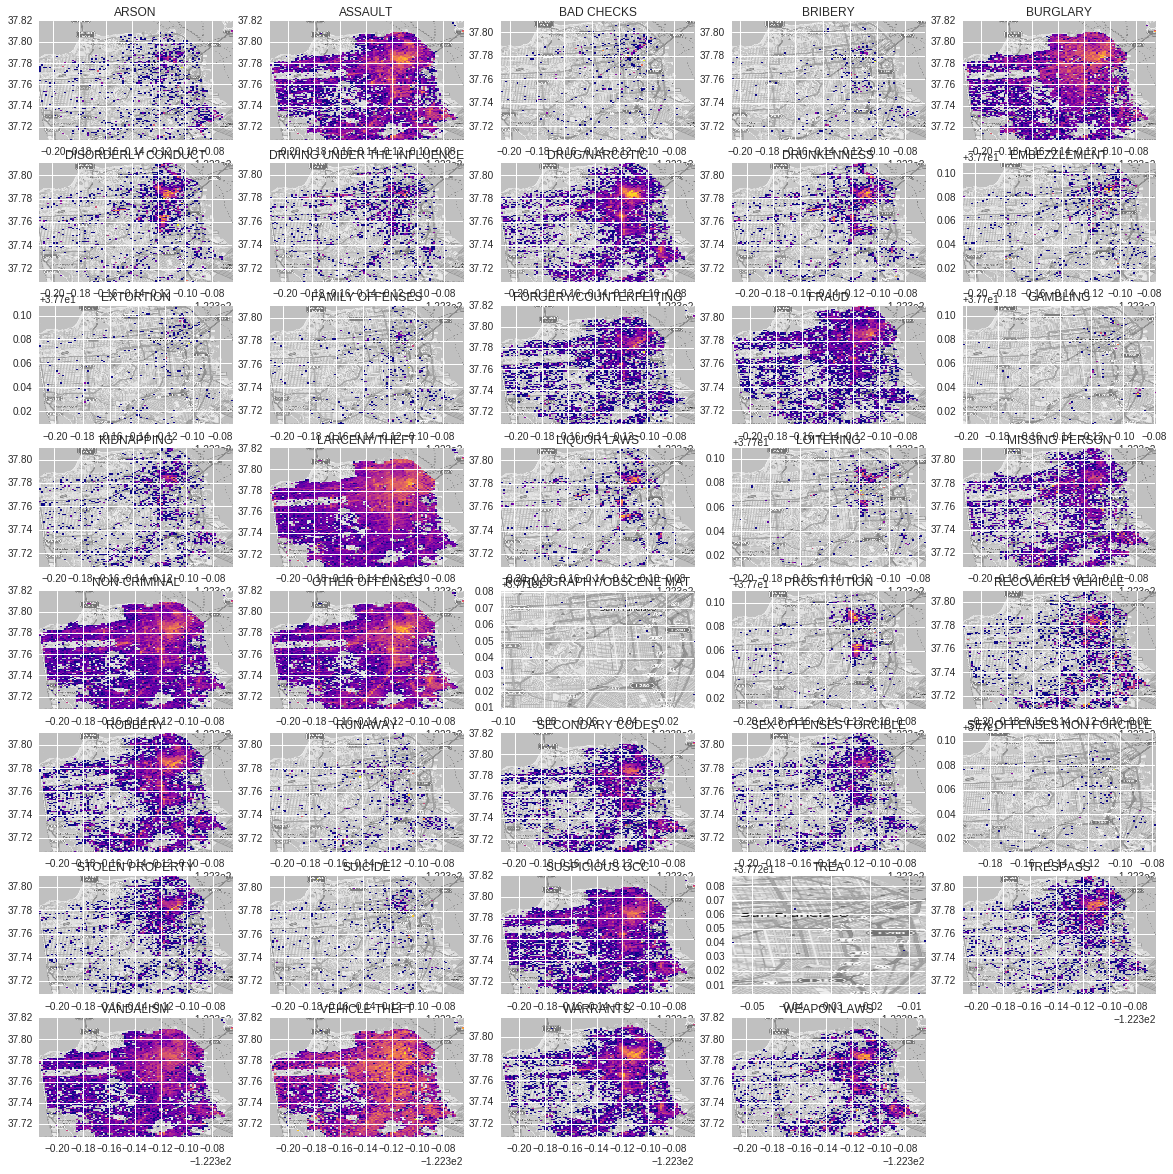

In [27]:
NX=100
NY=100
groups = train.groupby('Category')
ii=1
plt.figure(figsize=(20, 20))
for name, group in groups:
    plt.subplot(8,5,ii)
    histo, xedges, yedges = np.histogram2d(np.array(group.X),np.array(group.Y), bins=(NX,NY))
    myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[ll_lon, ur_lon, ll_lat, ur_lat], aspect=asp)
    plt.imshow(histo.T,origin='low',extent=myextent,interpolation='nearest',aspect='auto',norm=LogNorm(), cmap = 'plasma')
    plt.title(name)
    ii+=1
del groups

In [ ]:
z = zipfile.ZipFile('train.csv.zip')
print(z.namelist())

train = pd.read_csv(z.open('train.csv'), parse_dates=['Dates'])

train['Year'] = train['Dates'].map(lambda x: x.year)
train['Week'] = train['Dates'].map(lambda x: x.week)
train['Hour'] = train['Dates'].map(lambda x: x.hour)

print(train.head())

train.PdDistrict.value_counts().plot(kind='bar', figsize=(8,10))
plt.savefig('district_counts.png')


train['event']=1
weekly_events = train[['Week','Year','event']].groupby(['Year','Week']).count().reset_index()
weekly_events_years = weekly_events.pivot(index='Week', columns='Year', values='event').fillna(method='ffill')
#%matplotlib inline
ax = weekly_events_years.interpolate().plot(title='number of cases every 2 weeks', figsize=(10,6))
plt.savefig('events_every_two_weeks.png')


hourly_events = train[['Hour','event']].groupby(['Hour']).count().reset_index()
hourly_events.plot(kind='bar', figsize=(6, 6))
plt.savefig('hourly_events.png')


hourly_district_events = train[['PdDistrict','Hour','event']].groupby(['PdDistrict','Hour']).count().reset_index()
hourly_district_events_pivot = hourly_district_events.pivot(index='Hour', columns='PdDistrict', values='event').fillna(method='ffill')
hourly_district_events_pivot.interpolate().plot(title='number of cases hourly by district', figsize=(10,6))
plt.savefig('hourly_events_by_district.png')

Credit to Ben Hammer, 
Map Source: open street map in ggmap R package